<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Exercise_9_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
!pip install swig --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d] --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 20.7 MB/s eta 0:00:00


In [3]:
!pip install renderlab --quiet

In [4]:
!pip install ray[rllib] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 MB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langgraph-checkpoint 3.0.1 requires ormsgpack>=1.12.0, but you have ormsgpack 1.7.0 which is incompatible.


# Question 2

The three main functions in a Gymnasium environment are step, reset, and render. They are used to train RL agents.

## Step Function

The step(action) function executes a timestep using the agent's actions. When the end of an episode is reached, it is necessary to call the reset() function to reset the environment's state for the next stage. It accepts an action from the agent as an argument and the environment then calculates the new state.

It returns a total of 5 values:

* **observation**: An element of the environment's observation_space, representing the next observation resulting from the agent's actions.

* **reward**: The reward resulting from the execution of the action.

* **terminated**: Boolean value. Indicates if the agent reached a terminal state. It can be either positive (success) or negative (failure/crash).

* **truncated**: Boolean value. Indicates if a truncation condition outside the MDP was satisfied. Usually, this is a timelimit, but it can also indicate the agent went out of bounds. If True, the user must call the reset() function.

* **info**: Contains auxiliary diagnostic information.

In older versions, the step function also returned the **done** value, a boolean variable indicating if the episode had finished, althought it was removed due to the introduction of the terminated and truncated attributes.

## Reset Function

The reset function restores the environment to an initial internal state, returning an initial observation and information (info). It creates a new initial state, usually with some randomness, to ensure the agent explores the state space.

It accepts 2 optional arguments:

* **seed**: Used to initialize the environment's pseudo-random number generator (PRNG) so that the same sequence of random states can be reproduced. If no value is given (seed=None), randomness is determined automatically by the system.

* **options**: A dictionary containing optional information about how the environment is reset.

It returns a total of 2 values:

* **observation**: The observation of the initial state. It will be an element of the observation_space.

* **info**: A dictionary containing auxiliary information complementing the observation.

## Render Function

The render() function is responsible for visualizing the state of the environment, as it produces render frames according to the render_mode specified during the environment's initialization. The metadata env.metadata["render_nodes"] contains the available render modes.

If the render_mode is:

* **None**: Default. No rendering is performed.

* **"human"**: The environment continuously renders to the current display or terminal. Rendering happens during the step() call, and calling render() is not necessary.

* **"rgb_array"**: Returns a frame representing the current state of the environment. The frame is a np.ndarray with dimensions (x, y, 3) representing RGB values.

* **"ansi"**: Returns a string containing a text-based representation of the state.

* **"rgb_array_list"** and **"ansi_list"**: Collect all frames into a list during step().

# Question 3

In the LunarLander-v3 environment, the goal is to safely land the spacecraft between the two yellow flags.

## Observation Space

The Observation Space is a continuous space (Box) consisting of a vector of 8 numerical values, which describe the physical state of the Lander at any given moment. Specifically, the vector includes:

* **Position X**: The horizontal coordinate.

* **Position Y**: The vertical coordinate.

* **Velocity X**: The horizontal velocity.

* **Velocity Y**: The vertical velocity.

* **Angle**: The tilt of the craft.

* **Angular Velocity**: How fast the craft is rotating.

* **Left Leg Contact**: Boolean (1 if touching ground, 0 if not).

* **Right Leg Contact**: Boolean (1 if touching ground, 0 if not).

## Action Space

The Action Space is discrete (Discrete(4)), meaning the agent must choose one of 4 possible actions at each step:

* **0 (Do nothing)**: No action (engine is off).

* **1 (Fire left orientation engine)**: Fires the left orientation engine (pushes the craft to the right).

* **2 (Fire main engine)**: Fires the main engine (pushes the craft upwards).

* **3 (Fire right orientation engine)**: Fires the right orientation engine (pushes the craft to the left).

## Reward Function

The reward system is designed to encourage safe landing and fuel efficiency, with Points being calculated as follows:

* **Movement**: Moving from the top to the landing pad yields approximately 100-140 points.

* **Crash**: If the craft crashes, 100 points are deducted (-100).

* **Safe Landing**: If the craft comes to rest (asleep), it receives +100 points.

* **Leg Contact**: Each leg touching the ground yields +10 points.

* **Fuel Cost**: Firing the main engine costs -0.3 points per frame (encourages fuel conservation).

* **Side Engines**: Firing side engines costs -0.03 points per frame.

# Question 4

In [5]:
import gymnasium as gym
import renderlab as rl

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
      break

env.play()
env.close()

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Question 5

In [6]:
import numpy as np

env = gym.make("LunarLander-v3", render_mode="rgb_array")

total_rewards = []
num_episodes = 5

for episode in range(num_episodes):
    observation, info = env.reset()
    total_reward = 0

    while True:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break

    total_rewards.append(total_reward)
    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

average_score = np.mean(total_rewards)
env.close()

Episode 1: Total Reward = -86.15688656165865
Episode 2: Total Reward = -130.88384957099407
Episode 3: Total Reward = -104.34068708302037
Episode 4: Total Reward = -123.41412987610806
Episode 5: Total Reward = -98.26909759345025


In [7]:
print(f"Average Score: {average_score}")

Average Score: -108.61293013704628


# Question 6

In [8]:
!pip install stable-baselines3[extra] --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 7.3 MB/s eta 0:00:00


In [9]:
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import time

training_steps = 100000

  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Train DQN

In [10]:
env = gym.make("LunarLander-v3")
monitor_env = Monitor(env)
dqn = DQN("MlpPolicy", monitor_env, verbose=0)
start_time = time.time()
dqn.learn(total_timesteps=training_steps)
dqn_time = time.time() - start_time
dqn_history = monitor_env.get_episode_rewards()

  return datetime.utcnow().replace(tzinfo=utc)



In [11]:
print("DQN Training Time: ", dqn_time)

DQN Training Time:  129.0979118347168


## Train PPO

In [12]:
env = gym.make("LunarLander-v3")
monitor_env = Monitor(env)
ppo = PPO("MlpPolicy", monitor_env, verbose=0)
start_time = time.time()
ppo.learn(total_timesteps=training_steps)
ppo_time = time.time() - start_time
ppo_history = monitor_env.get_episode_rewards()

  warnings.warn(



In [13]:
print("PPO Training Time: ", ppo_time)

PPO Training Time:  219.6541531085968


# Question 7

In [14]:
def evaluate_agent(model, name, episodes=5):
  eval_env = gym.make("LunarLander-v3")
  mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=episodes)
  print(f"{name} Mean Reward: {mean_reward} +/- {std_reward}")
  return mean_reward

## Evaluate Models

In [15]:
dqn_score = evaluate_agent(dqn, "DQN")
ppo_score = evaluate_agent(ppo, "PPO")

  warnings.warn(



DQN Mean Reward: 31.32108183321543 +/- 55.123856029719654
PPO Mean Reward: -38.31499999642838 +/- 43.5360231277795


## Plot training rewards

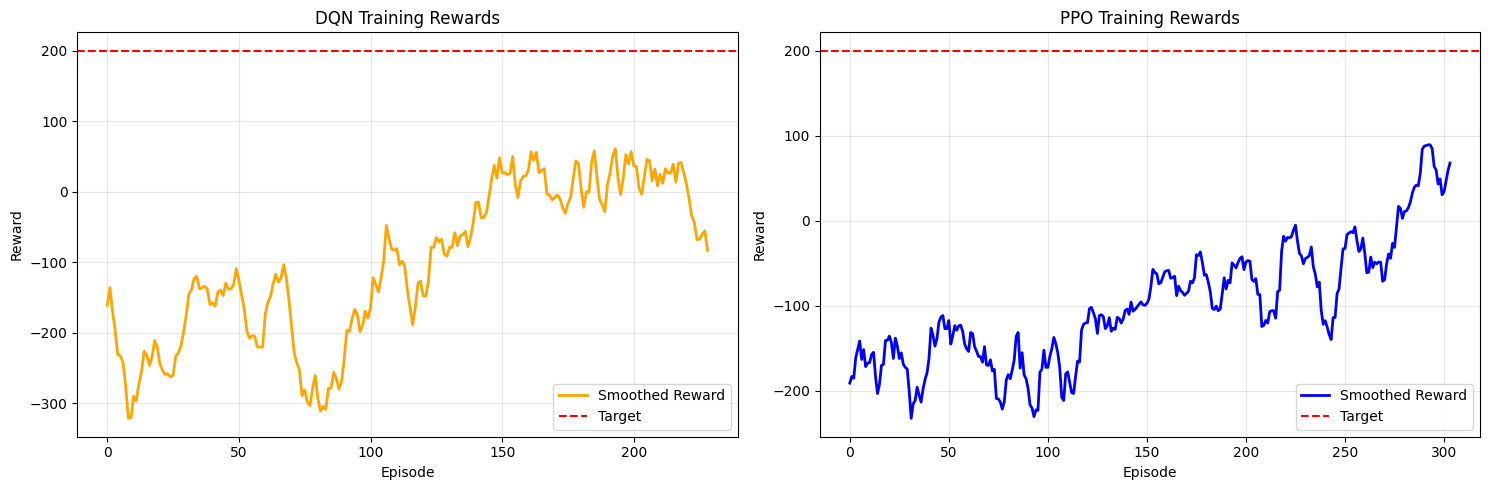

In [16]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

if len(dqn_history) >= 10:
  dqn_smooth = np.convolve(dqn_history, np.ones((10,))/10, mode='valid')
  ax1.plot(dqn_smooth, color='orange', linewidth=2, label='Smoothed Reward')
else:
  ax1.plot(dqn_history, color='orange', linewidth=1, label='Reward')

ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward")
ax1.set_title("DQN Training Rewards")
ax1.grid(True, alpha=0.3)
ax1.axhline(y=200, color='r', linestyle='--', label='Target')
ax1.legend()

if len(ppo_history) >= 10:
  ppo_smooth = np.convolve(ppo_history, np.ones((10,))/10, mode='valid')
  ax2.plot(ppo_smooth, color='blue', linewidth=2, label='Smoothed Reward')
else:
  ax2.plot(ppo_history, color='blue', linewidth=1, label='Reward')

ax2.set_xlabel("Episode")
ax2.set_ylabel("Reward")
ax2.set_title("PPO Training Rewards")
ax2.grid(True, alpha=0.3)
ax2.axhline(y=200, color='r', linestyle='--', label='Target')
ax2.legend()

plt.tight_layout()
plt.show()

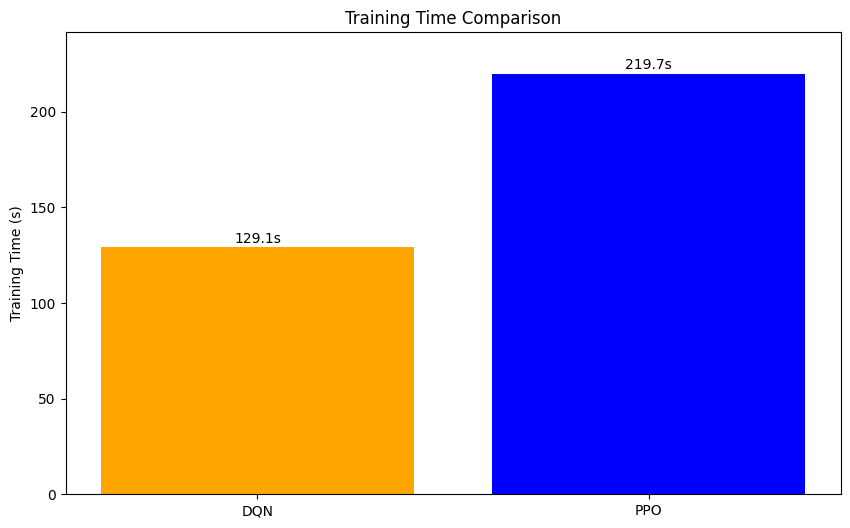

In [17]:
labels = ["DQN", "PPO"]
times = [dqn_time, ppo_time]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, times, color=['orange', 'blue'])
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.ylim(0, max(times) * 1.1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}s", ha='center', va='bottom')

plt.show()

# Question 8

## Train DQN

In [18]:
env = gym.make("LunarLander-v3")
monitor_env = Monitor(env)

dqn_tuned = DQN(
    "MlpPolicy",
    monitor_env,
    learning_rate=6.3e-4,
    buffer_size=50000,
    batch_size=128,
    gamma=0.99,
    target_update_interval=250,
    train_freq=4,
    gradient_steps=-1,
    exploration_fraction=0.12,
    exploration_final_eps=0.1,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=0
)

start_time = time.time()
dqn_tuned.learn(total_timesteps=training_steps)
dqn_tuned_time = time.time() - start_time
dqn_tuned_history = monitor_env.get_episode_rewards()

env.close()

In [19]:
print("DQN Training Time: ", dqn_tuned_time)

DQN Training Time:  305.67141342163086


## Train PPO

In [20]:
from stable_baselines3 import PPO

env = gym.make("LunarLander-v3")
monitor_env = Monitor(env)

ppo_tuned = PPO(
    "MlpPolicy",
    monitor_env,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    ent_coef=0.01,
    verbose=0
)

start_time = time.time()
ppo_tuned.learn(total_timesteps=training_steps)
ppo_tuned_time = time.time() - start_time
ppo_tuned_history = monitor_env.get_episode_rewards()

env.close()

In [21]:
print("PPO Training Time: ", ppo_tuned_time)

PPO Training Time:  171.01995968818665


In [22]:
dqn_score = evaluate_agent(dqn_tuned, "DQN")
ppo_score = evaluate_agent(ppo_tuned, "PPO")

DQN Mean Reward: 214.34157401507278 +/- 45.586438784894604
PPO Mean Reward: -160.69284532447347 +/- 71.5937300525437


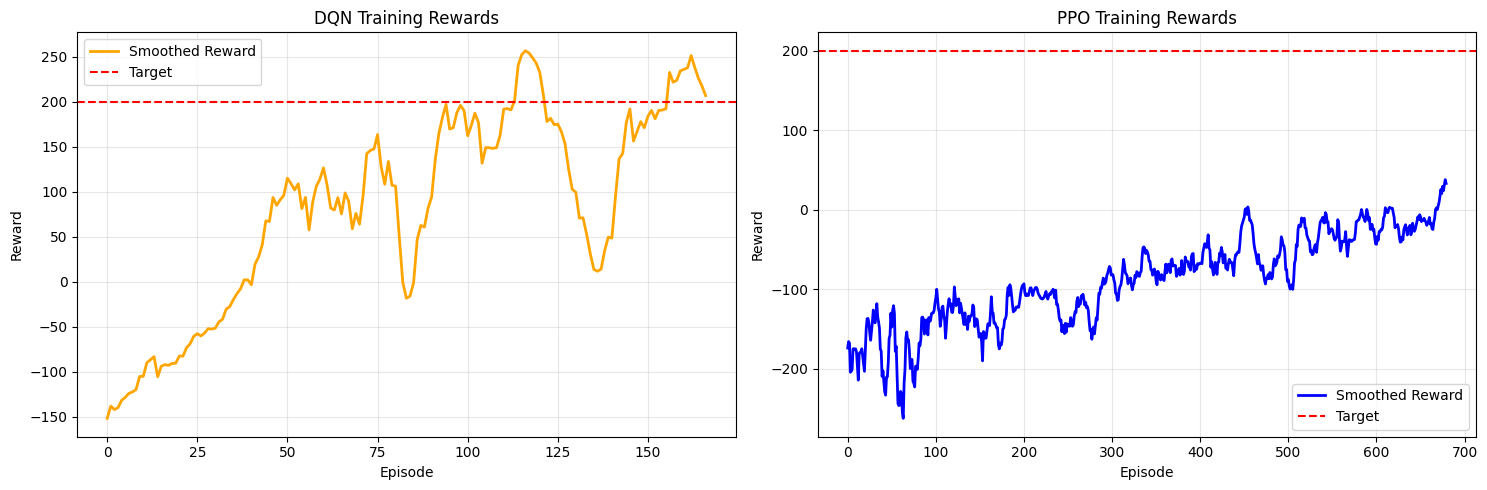

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

if len(dqn_tuned_history) >= 10:
  dqn_smooth = np.convolve(dqn_tuned_history, np.ones((10,))/10, mode='valid')
  ax1.plot(dqn_smooth, color='orange', linewidth=2, label='Smoothed Reward')
else:
  ax1.plot(dqn_tuned_history, color='orange', linewidth=1, label='Reward')

ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward")
ax1.set_title("DQN Training Rewards")
ax1.grid(True, alpha=0.3)
ax1.axhline(y=200, color='r', linestyle='--', label='Target')
ax1.legend()

if len(ppo_tuned_history) >= 10:
  ppo_smooth = np.convolve(ppo_tuned_history, np.ones((10,))/10, mode='valid')
  ax2.plot(ppo_smooth, color='blue', linewidth=2, label='Smoothed Reward')
else:
  ax2.plot(ppo_tuned_history, color='blue', linewidth=1, label='Reward')

ax2.set_xlabel("Episode")
ax2.set_ylabel("Reward")
ax2.set_title("PPO Training Rewards")
ax2.grid(True, alpha=0.3)
ax2.axhline(y=200, color='r', linestyle='--', label='Target')
ax2.legend()

plt.tight_layout()
plt.show()

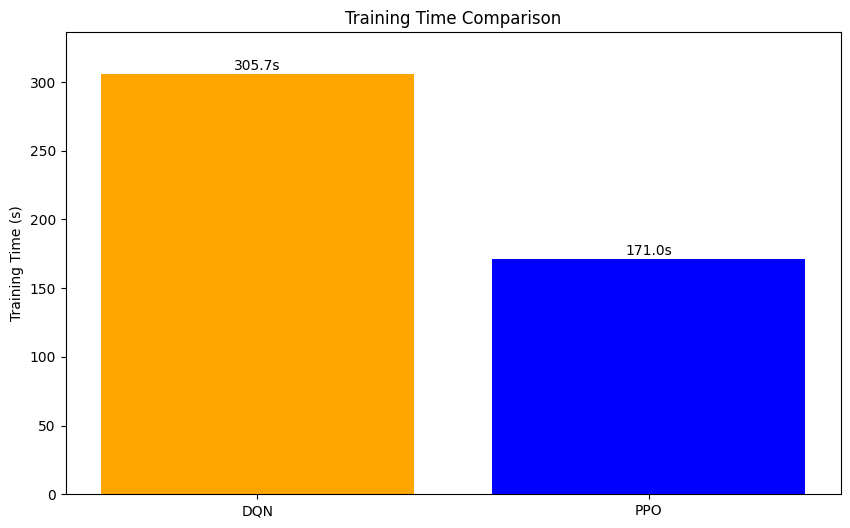

In [24]:
labels = ["DQN", "PPO"]
times = [dqn_tuned_time, ppo_tuned_time]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, times, color=['orange', 'blue'])
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.ylim(0, max(times) * 1.1)

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}s", ha='center', va='bottom')

plt.show()